<a href="https://colab.research.google.com/github/ChristianDuranBonilla/Intelligent_Systems/blob/main/Midterm_exam_Version_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm exam - Version II

## Magix square, Minimax, Constraint satisfaction and Magic number solutions
***A Python implementation***

Based on this: Midterm exam - Version II.

***By***
- Christian Emmanuel Durán Bonilla A01369955

## Summary

Solve the following problems and/or answer what is requested. Please consider the following when solving this exam.

* You are allowed to consult any materials from the lectures, books, or the Internet. However, you are requested to complete this assignment by yourself. Commenting on your answers with your classmates or requesting help from any LLM such as Llama, ChatGPT or Gemini will be considered cheating and will invalidate your exam.
* The answers are expected to be straightforward. So, please be concise. A long answer may suggest that you are trying to "guess" and may affect your grade.
* The questions that are not programming assignments must be hand-written and submitted as a PDF. If the solution is not hand-written it will not be accepted. It is your responsibility to provide a legible document. If I do not understand what you wrote, I will assume it is incorrect and you will lose those points.

# Solutions

The solutions to the programming exercises are described below.

## 1. 3 x 3 Magic square (12.5%)


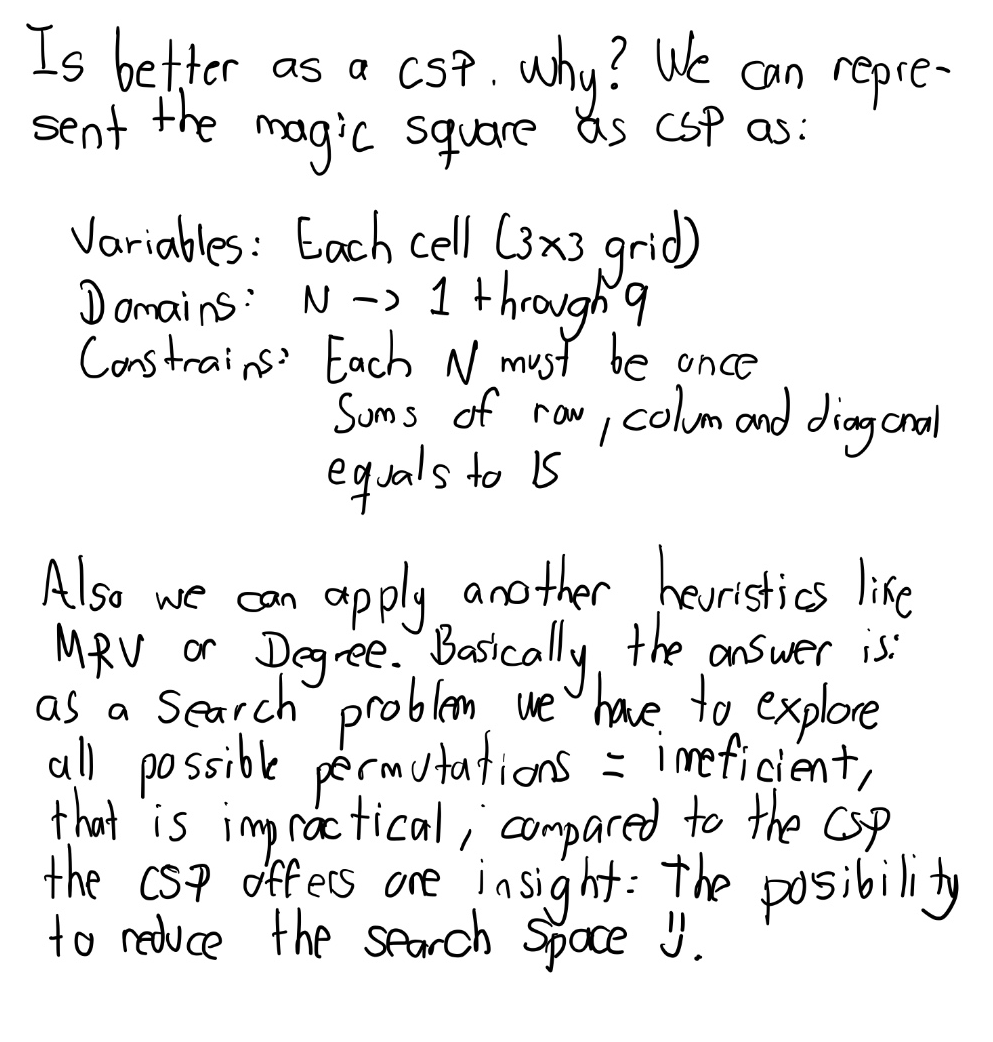

## 2. Minimax playing against suboptimal moves (12.5%)


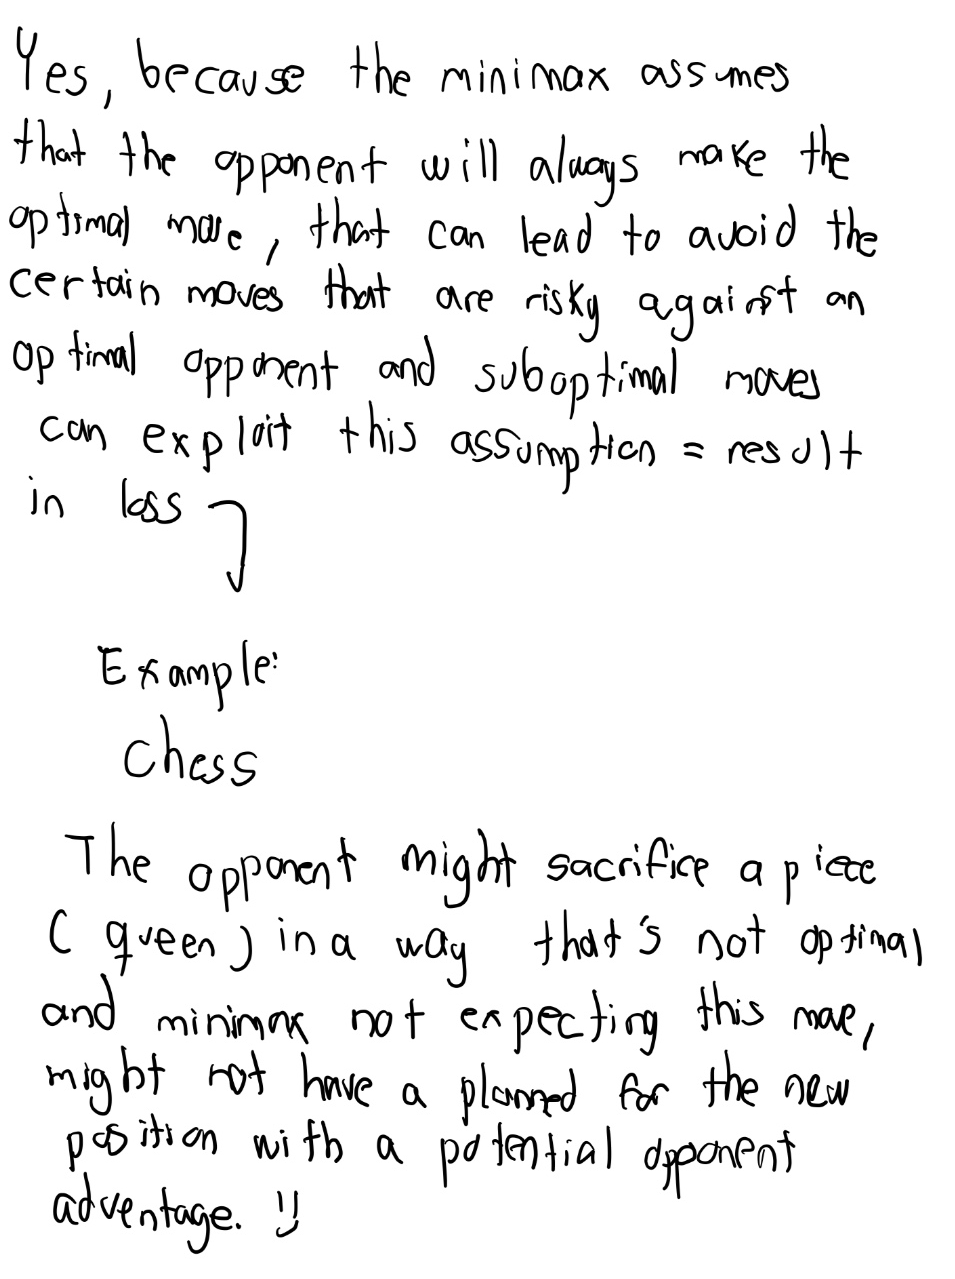


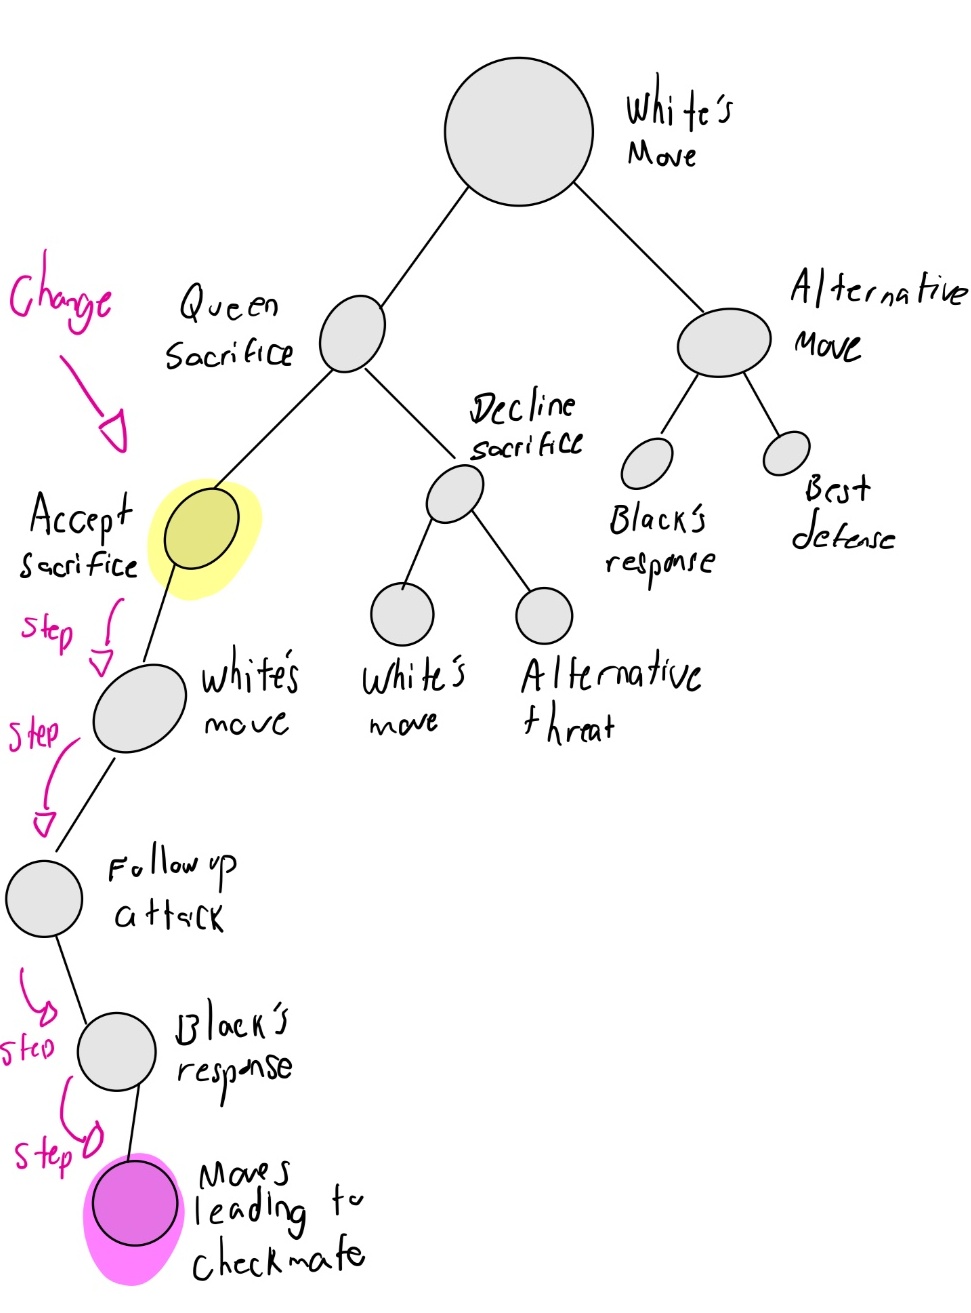

## 3. Constraint satisfaction problems (25%)

Consider a CSP defined by the following variables, domains and constraints:

Variables
- x1, x2, x3, x4, and x5 .

Domains

- x1 = {1, 3, 4}
- x2 = {1, 2, 3}
- x3 = {1, 3, 4}
- x4 = {1, 2, 3}
- x, = {1, 2, 3}

Constraints

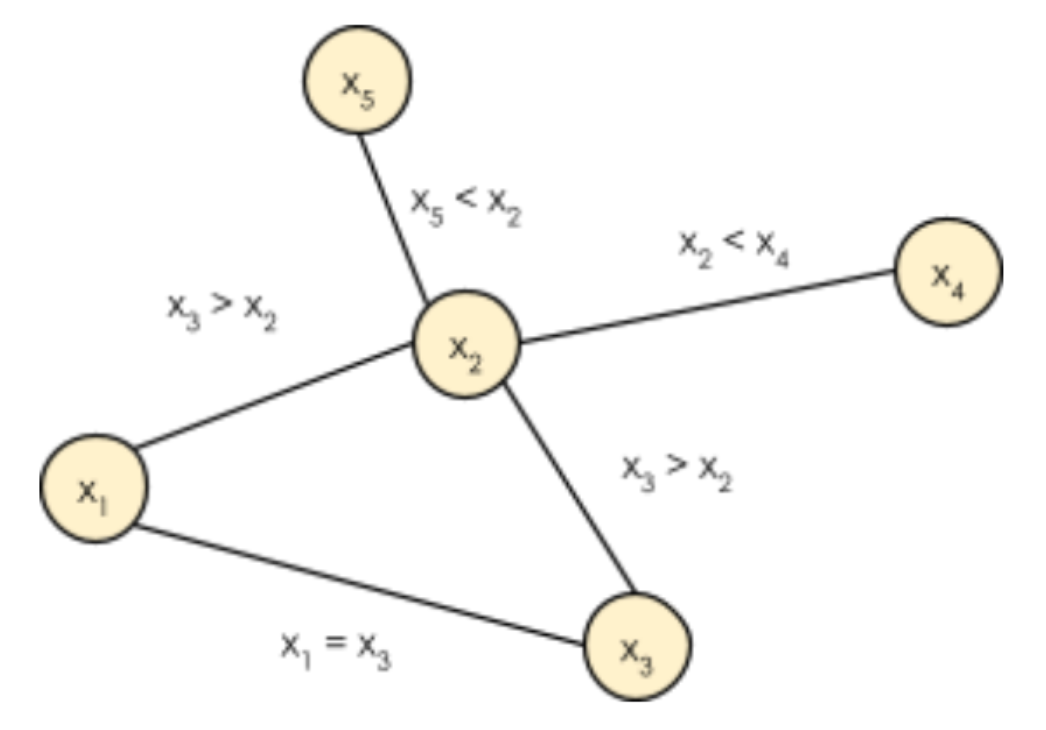

Write a program in Python, using Google Colab, that solves this problem or proves it is unsatisfiable. For this assignment, you are not allowed to use any specialized libraries to handle the constraints. Besides, consider that you must solve this problem as a CSP (using DFS and backtracking). Using any other technique, such as brute force will invalidate your solution. The solution requires you to provide a link to your implementation in Google Colab. No other forms of submission will be accepted, so be sure that the program is publicly accessible.

### Step 0: Understanding the problem


**Constraint Satisfaction Problem (CSP)**

A Constraint Satisfaction Problem (CSP) is widely used to represent and solve problems where a goal is to be achieved by searching within a set of assigned variables that satisfy the constraints. In this way we have 3 components for CSP:

* X as a set of variables
* D as a set of domains representing the available values
* C as a set of constraints representing the allowed combinations of values.

Thus, it is necessary to define a state space, values assigned to the variables and a variation of strategies such as DFS, to obtain a consistent solution that meets the constraints and completes the assignment.  

**Specific Case**

For this specific case, we are provided with the three necessary sets (X, D and C), the components to form a CSP and its respective solution. Our objective is to find assignments to the variables (satisfied constraints) or to prove that no such assignment exists.

Then we have:

1. Binary constants (have two variables).
2. Connections of the edges represented by the relationships between the 3. variables.
3. We will use Depth-First Search (DFS) with backtracking to explore possible values for the variables.

As a solution strategy we can use:

* A heuristic such as variable ordering, where we can select the variables based on the minimum remaining value (MRV), which selects the variable with the smallest domain first.
* Sort the values in ascending order of the variables.
* Constant checking of each assignment to verify if the constraints have been satified.

### Step 1: Defining variables and domains

In [ ]:
variables = ['x2', 'x1', 'x3', 'x4', 'x5']

domains = {
    'x1': [1, 3, 4],
    'x2': [1, 2, 3],
    'x3': [1, 3, 4],
    'x4': [1, 2, 3],
    'x5': [1, 2, 3],
}

We define the variables in an order based on the MRV and Degree heuristics (selected by the number of restrictions, that means: x2: 4 restrictions, x1: 2 restrictions, x3: 2 restrictions, x4: 1 restriction and x5: 1 restriction), also we define the domain corresponding to what we are given in the problem. Assigning x2 first, we can quickly reduce the search space by eliminating values that cannot satisfy multiple constraints simultaneously, why? because the constraints involving x2 can be applied immediately, which can reduce the number of possible assignments for the other variables



### Step 2: Constraints function

In [ ]:
def constraints(assignment):
    x1 = assignment.get('x1', None)
    x2 = assignment.get('x2', None)
    x3 = assignment.get('x3', None)
    x4 = assignment.get('x4', None)
    x5 = assignment.get('x5', None)

    if x1 is not None and x2 is not None:
      if not (x1 > x2):
        return False

    if x1 is not None and x3 is not None:
      if not (x1 == x3):
        return False

    if x5 is not None and x2 is not None:
      if not (x5 < x2):
        return False

    if x2 is not None and x4 is not None:
      if not (x2 < x4):
        return False

    if x3 is not None and x2 is not None:
      if not (x3 > x2):
        return False

    return True

The function checks if the assignments satisfy all the constraints, in which case if any constraint is not satisfied it returns False, otherwise True.

### Step 3: Backtracking

In [ ]:
def solve_csp(current_assignment):
    if len(current_assignment) == len(variables):
        if constraints(current_assignment):
            return current_assignment
        else:
            return None

    remaining_vars = [variable for variable in variables if variable not in current_assignment]
    next_var = remaining_vars[0]

    for potential_value in domains[next_var]:
        tentative_assignment = current_assignment.copy()
        tentative_assignment[next_var] = potential_value

        if constraints(tentative_assignment):
            result = solve_csp(tentative_assignment)

            if result is not None:
                return result

    return None

The backtracking fucntion uses DFS + backtracking, it selects an unassigned variable and tries each value in its domain. For each assignment, it checks if the constraints are satisfied, if a conflict is detected, it backtracks and tries the next value, also he search continues recursively until a solution is found or all possibilities are exhausted.

### Step 4: Results

In [ ]:
solution = solve_csp({})

if solution:
    print("Valid solution:) :")
    for var in variables:
        print(f"{var} = {solution[var]}")

    print("\nDetailed Constraint Verification:")
    constraints_list = [
        ("x1 > x2", solution['x1'] > solution['x2']),
        ("x1 = x3", solution['x1'] == solution['x3']),
        ("x5 < x2", solution['x5'] < solution['x2']),
        ("x2 < x4", solution['x2'] < solution['x4']),
        ("x3 > x2", solution['x3'] > solution['x2']),
    ]

    for constraint, result in constraints_list:
        print(f"{constraint}: {result}")

    print("\nAll constraints are satisfied Yupiii" if all(result for _, result in constraints_list) else "\nSome constraints are not satisfied")
else:
    print("The problem doesn't have a valid solution :(")

Valid solution:) :
x2 = 2
x1 = 3
x3 = 3
x4 = 3
x5 = 1

Detailed Constraint Verification:
x1 > x2: True
x1 = x3: True
x5 < x2: True
x2 < x4: True
x3 > x2: True

All constraints are satisfied Yupiii


We check if a solution was found and print the result. It is important to note that the problem requires DFS + Backtracking but we could implement other forms of solution, for example using backjumping to reduce the inefficient or even unnecessary backtracking, as well as applying other techniques such as heuristics that can sort the values and update on the constraints of each of these.

## 4. Magic number (25%)



There is a three digit number which:
* If you add seven to it it divides exactly by seven.
* If you add eight to it it divides exactly by eight.
* If you add nine to it it divides exactly by nine.

Write a program in Python, using Google Colab, that solves this problem using any of the search strategies seen in class (DFS, BFS, Uniform-cost search, Greedy-search or A*). Using any other technique, such as brute force will invalidate your solution. The solution requires you to provide a link to your implementation in Google Colab. No other forms of submission will be accepted, so be sure that the program is publicly accessible.

### Step 0: Understanding the problem


 A*   

The A* algorithm is a widely used pathfinding and graph traversal algorithm, known for its performance and accuracy to find the shortest path between a start node and a goal node in a weighted graph, which may represent, for example, road maps or movements in a grid (videogames).


**Specific Case**

In this specific case, we are tasked with finding a three-digit number  N  that satisfies the following conditions:

1. When you add 7 to it, it divides exactly by 7.
2. When you add 8 to it, it divides exactly by 8.
3. When you add 9 to it, it divides exactly by 9.

Our objective is to find such a number using one of the search strategies learned in class, specifically A* in this case.

We will:

* Use A* and prioritizes numbers closer to meeting all conditions
* Upon finding the number that satisfies all conditions, it returns that number

### Step 1: Importing Libreries

In [ ]:
import heapq

We import heapq which provides for a regular lists, that will be used to create a priority queue for A*.

### Step 2: Defining conditions

In [ ]:
def conditions_function(n):
  conditions = ((n + 7) % 7 == 0) and ((n + 8) % 8 == 0) and ((n + 9) % 9 == 0)
  return conditions

This function checks if the given three-digit number n satisfies all three conditions:

1. n + 7 is divisible by 7.
2. n + 8 is divisible by 8.
3. n + 9 is divisible by 9.

It returns True if all conditions are met and False otherwise.

### Step 3: Defining heuristic

In [ ]:
def heuristic(n):
  h=0
  if (n + 7) % 7 != 0 :
    h += 1
  if (n + 8) % 8 != 0 :
    h += 1
  if (n + 9) % 9 != 0 :
    h += 1
  return h

This heuristic estimates how close a number n is to satisfaying all the conditions by counting the number of conditions not curently satisfied by n. The value h can range from 0 (all conditions satisfied) to 3 (no conditions satisfied)

### Step 4: A* algorithm

In [ ]:
def a_star():
  master_list = []
  heapq.heappush(master_list, (heuristic(100), 100))
  visited = set()

  while master_list:
    _, n = heapq.heappop(master_list)
    if n in visited:
      continue

    visited.add(n)
    print(visited)

    if conditions_function(n):
      return n

    for sum in [7, 8, 9]:
      nm = n + sum
      if 100 <= nm <= 999 and nm not in visited:
        heapq.heappush(master_list, (heuristic(nm), nm))

  return None

First we create a priority queue that stores tuples, and we start by putting the initial number 100 into master_list, and track the numbers we have already evaluated. In the while, we skip the number n with the lowest heuristic value, if n has already been visited, we skip to the next iteration, otherwise the n is added to the visited set. If n satisfies the conditions we have the results. We also generate successor numbers by adding 7, 8 and 9 to n, for each successor nm if it is a three-digit number and has not been visited, we push it to master_list with its heuristic value

### Step 5: Result

In [ ]:
print("The result is: ", a_star())

{100}
{108, 100}
{108, 100, 117}
{108, 100, 117, 126}
{100, 133, 108, 117, 126}
{100, 133, 135, 108, 117, 126}
{100, 133, 135, 108, 144, 117, 126}
{100, 133, 135, 108, 140, 144, 117, 126}
{100, 133, 135, 108, 140, 144, 147, 117, 126}
{100, 133, 135, 108, 140, 144, 147, 117, 152, 126}
{100, 133, 135, 108, 140, 144, 147, 117, 152, 153, 126}
{100, 133, 135, 108, 140, 144, 147, 117, 152, 153, 154, 126}
{160, 100, 133, 135, 108, 140, 144, 147, 117, 152, 153, 154, 126}
{160, 100, 133, 135, 168, 108, 140, 144, 147, 117, 152, 153, 154, 126}
{160, 161, 100, 133, 135, 168, 108, 140, 144, 147, 117, 152, 153, 154, 126}
{160, 161, 162, 100, 133, 135, 168, 108, 140, 144, 147, 117, 152, 153, 154, 126}
{160, 161, 162, 100, 133, 135, 168, 171, 108, 140, 144, 147, 117, 152, 153, 154, 126}
{160, 161, 162, 100, 133, 135, 168, 171, 108, 140, 175, 144, 147, 117, 152, 153, 154, 126}
{133, 135, 140, 144, 147, 152, 153, 154, 160, 161, 162, 168, 171, 175, 176, 100, 108, 117, 126}
{133, 135, 140, 144, 147, 152, 

Finally, the result. This was really quite complicated to program, that is to say, first I tried with bfs and it added 1 but it was brute force, besides the other algorithms (BFS, greedy, etc) were not very efficient in my opinion, for that reason I implemented A* since I see a great application to how they do it in the search of the paths to move a character in video games, being then that with such analogy I thought that the click or destination of the character could be in this case certain coordinates, which we could assume that in this case would be the three conditions and would have to find the way to that place.

Llama Elitista. (2024, 5 septiembre). ¿Por qué este Algoritmo está en tantos Videojuegos? - A* Explicado [Vídeo]. YouTube. https://www.youtube.com/watch?v=hQa9JTtq4Ok

## Bibliographic references

[1] Ortiz, J. (2024). Class Presentations. Tecnológico de Monterrey.
[2] GeeksforGeeks. (2024, 9 agosto). Breadth First Search or BFS for a Graph. GeeksforGeeks. https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/
[3] GeeksforGeeks. (2024a, julio 30). A* search algorithm. GeeksforGeeks. https://www.geeksforgeeks.org/a-search-algorithm/


